<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px; width: 180px">
            <img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo">
        </td>
        <td style="width: 100%">
            <div style="width: 100%; text-align:right"><font style="font-size:38px"><b>Softwaredesign</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>WS 2023</b></font></div>
        </td>
    </tr>
</table>

---

# 01_05_Python Grundlagen - Klasse zur Datenverarbeitung

Für Sie ist das Grundgerüst einer Klasse `DataContainer` vorgegeben in der (eindimensionale) Daten, z.B. Zeitreihen, gespeichert werden können.
Diese Klasse enthält einige hilfreiche Methoden, um die Daten beispielsweise zu plotten.

Ihre Aufgabe ist es nun zwei weitere eigene Klassen zu schreiben die mit diesen `DataContainer` Objekten interagieren können.
Zum einen soll eine Klasse `MovingAverageProcessor` und eine Klasse `RMSEProcessor` geschrieben werden.


### Notwendige imports

In [ ]:
import math
from typing import List, Tuple

import numpy as np
import matplotlib.pyplot as plt


### Definition der `DataContainer` Klasse

In [50]:
class DataContainer():

    # Konstruktor der Klasse DataContainer
    def __init__(self, x_data: List[float] = [], y_data: List[float] = []) -> None:
        self.x_data = x_data
        self.y_data = y_data

        #Exception werfen wenn Daten nicht gleich lang
        if len(self.x_data) != len(self.y_data):
            raise ValueError("x_data and y_data must have the same length")
    
    def get_x_data(self) -> List[float]:
        return self.x_data
    
    def get_y_data(self) -> List[float]:
        return self.y_data

    def set_x_data(self, x_data: List[float]) -> None:
        self.x_data = x_data

    def set_y_data(self, y_data: List[float]) -> None:
        self.y_data = y_data

    def get_x_mean(self) -> float:
        return sum(self.x_data) / len(self.x_data)

    def get_y_mean(self) -> float:
        return sum(self.y_data) / len(self.y_data)

    # Methode um die Daten zu plotten --> wird in einer späteren Einheit behandelt
    def plot(self) -> None:
        plt.plot(self.x_data, self.y_data, marker="o")
        plt.xlabel('x')
        plt.ylabel('y')

        # Hack to get the name of the instance variable for plotting --> should not be used in practice
        plt.title([k for k,v in globals().items() if v is self][0])        

        plt.show()

### Testen Sie die Klasse `DataContainer`

Geben Sie dazu den Mittelwert für die x-Daten und y-Daten aus.  
Plotten Sie die weiters die Daten.

In [ ]:
test_data = DataContainer([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [11, 19, 31, 47, 51, 63, 69, 89, 91, 104, 110, 119, 132, 139, 151])

#Lösung hier einfügen: 

x_mean = test_data.get_x_mean()
y_mean = test_data.get__ymean()

print(x_mean)
print(y_mean)




8.0
81.73333333333333


### Klassen zur Datenverarbeitung

Es sollen die Klassen `MovingAverageProcessor` und `RMSEProcessor` implementiert werden.

Jede Klasse besitzt einen Konstruktor (`__init__()`), der die etwaig notwendigen Parameter für die Berechnung entgegennimmt.

Beide Klassen besitzen eine `process()`-Methode die einen bzw. zwei `DataContainer`-Objekte als Argumente übergeben bekommen und auf diesen operieren.

Die `get_parameter()`-Methode soll jeweils die Parameter zurückgeben, die für die Berechnung notwendig sind (bei der `MovingAverageProcessor`-Klasse) bzw. darin bestimmt werden (bei der `RMSEProcessor`-Klasse).

In [52]:
class MovingAverageProcessor():

    def __init__(self, window_size: int) -> None:
        # Finish the implementation
        self.window_size = window_size

    def process(self, dc: DataContainer) -> DataContainer:
        # Calculate the moving average of the y_data in the DataContainer dc and return a new DataContainer with the averaged data
        averaged_y = []
        y_data = dc.get_y_data()
        
        for current_index in range(1, len(y_data) + 1):
            end = current_index
            start = current_index - self.window_size
            if start < 0:
                start = 0
            
            
            sub_list = y_data[start:end]
            mov_avg = sum(sub_list) / len(sub_list)
            averaged_y.append(mov_avg)

        return DataContainer(dc.get_x_data(), averaged_y)

    def get_parameter(self):
        # Finish the implementation and the type hints
        return self.window_size


In [53]:
class RMSEProcessor():

    def __init__(self) -> None:
        # Finish the implementation
        pass

    def process(self, data_container_one: DataContainer, data_container_two: DataContainer) -> float:
        # Calculate the RMSE for the two DataContainers
        y_one = data_container_one.get_y_data()
        y_two = data_container_two.get_y_data()

        squared_differences = []
        for i in range(len(y_one)):
            difference = y_one[i] - y_two[i]
            squared_differences.append(difference ** 2)

        average_squared_error = sum(squared_differences) / len(y_one)
        rmse = average_squared_error ** 0.5  # Quadratwurzel des Mittelwerts der quadrierten Fehler

        return rmse

    def get_parameter(self):
        # Finish the implementation and the type hints
        return None


### Testen der Implementierungen

Es sollen nun beide Implementierungen mit einem Beispiel getestet werden.

Zuerst soll der `test_data` `DataContainer` von zu Beginn verwendet werden und mit einem `MovingAverageProcessor`-Objekt mit Fensterlänge `3` bearbeitet werden.  
Speicher Sie die geglätteten Daten in einem neuen `DataContainer`-Objekt namens `processed_data`.

Plotten Sie zum Vergleich die Rohdaten und die geglätteten Daten, sowie geben Sie die Mittelwerte für die y-Daten beider `DataContainer`-Objekte aus.

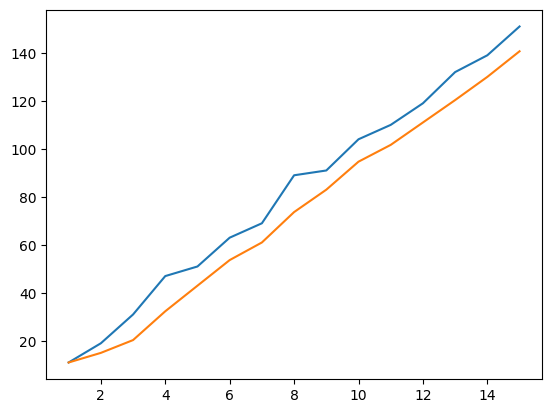

In [54]:
#Lösung hier einfügen:
import matplotlib.pyplot as plt

moving_average_processor = MovingAverageProcessor(window_size=3)
processed_data = moving_average_processor.process(test_data)
figure,axes = plt.subplots() 
axes.plot(test_data.get_x_data(), test_data.get_y_data(), label="Rohdaten")
axes.plot(processed_data.get_x_data(), processed_data.get_y_data(), label="Geglättete Daten")






Bestimmen Sie nun den RMSE zwischen den Rohdaten und den geglätteten Daten mit Hilfe des `RMSEProcessor`-Objekts.
Geben Sie den RMSE der Daten aus.

In [55]:

rmse_processor = RMSEProcessor()
rmse_value = rmse_processor.process(test_data, processed_data)
print(rmse_value)

#Bis hierhin habe ich die Aufgabe besten Gewissens alleine gelöst, jedoch bin ich mir mit meiner Lösung sehr unsicher. 


9.673177883734507


### Fragen

1. Welche Ähnlichkeiten und Unterschiede gibt es zwischen den beiden Implementierungen?
2. Welche Vorteile hat die Verwendung von Klassen in diesem Fall?
3. Angenommen Sie müssten dieses System an Klassen zur Datenverarbeitung um weitere Funktionalitäten erweitern, wie würden Sie vorgehen?

Beantworten Sie die Fragen in der folgenden Zelle.

